In [1]:
import xarray

In [2]:
import os, glob

In [24]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [30]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [31]:
fs=14
plt.rc("font",size=fs)

In [5]:
fname = "/Volumes/Baby-Orange/XPIA-NCAR/rawest/WRF_LES_25m_3D_2015-03-20_14:00.nc"

In [7]:
xr = xarray.open_dataset(fname)

In [25]:
xkm = xr.west_east*25/1000 - np.mean(xr.west_east*25/1000)
ykm = xr.south_north*25/1000 - np.mean(xr.west_east*25/1000)

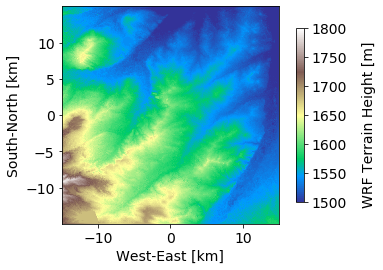

In [84]:
rectangle_spectra = [Rectangle((-30/2,-30/2), 30, 30)]
rectable_means    = [Rectangle((-15/2,-15/2), 15, 15)]

box_spectra = PatchCollection(rectangle_spectra, facecolor='None', edgecolor='k', linewidth=2)
box_means   = PatchCollection(rectable_means, facecolor='None', edgecolor='w', linewidth=1, linestyle='--')

fig = plt.figure()
ax  = fig.add_subplot(111,aspect="equal")
p = ax.pcolormesh(xkm, ykm, xr.terrain, cmap='terrain', vmin=1500, vmax=1800)
# ax.plot(0,0,marker='o',color='k')

# ax.add_collection(box_spectra)
# ax.add_collection(box_means)

# ax.set_xlim([-16,16])
# ax.set_ylim([-16,16])

clb = plt.colorbar(p,pad=0.05,shrink=0.8)
clb.set_label(r'WRF Terrain Height [m]', labelpad=15, y=0.45)

ax.set_xlabel("West-East [km]")
ax.set_ylabel("South-North [km]")
# ax.set_title("Innermost Domain")
fig.savefig("../figs/WRF-LES_domain.png",dpi=300,bbox_inches="tight")